<a href="https://colab.research.google.com/github/madilima/keras-tensorflow-2/blob/main/Aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:

import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [15]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [16]:

len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)

identificacoes_treino.min()
identificacoes_treino.max()

9

Exibir os dados

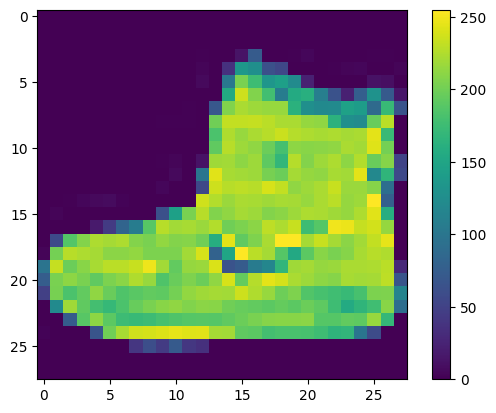

In [17]:

total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()


Normalizando as imagens


In [18]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo


In [19]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5245 - accuracy: 0.8142 - val_loss: 0.4101 - val_accuracy: 0.8561
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3974 - accuracy: 0.8568 - val_loss: 0.3636 - val_accuracy: 0.8687
Epoch 3/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3623 - accuracy: 0.8668 - val_loss: 0.3847 - val_accuracy: 0.8540
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3381 - accuracy: 0.8758 - val_loss: 0.3496 - val_accuracy: 0.8719
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3238 - accuracy: 0.8800 - val_loss: 0.3441 - val_accuracy: 0.8734


Sumário


In [20]:
sumario_do_modelo = modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Pesos da primeira camada Dense

In [21]:
pesos_camada_dense = modelo.layers[1].get_weights()
pesos_camada_dense

[array([[-0.06798375, -0.08977786,  0.06254933, ..., -0.03306213,
          0.04425021, -0.10361452],
        [ 0.00071475,  0.2005491 , -0.04243508, ..., -0.07623924,
          0.00799334,  0.0153052 ],
        [-0.08735652,  0.02230615,  0.00556348, ...,  0.06180562,
         -0.07087059,  0.19153914],
        ...,
        [ 0.03984752,  0.13317192, -0.08746088, ...,  0.06852812,
         -0.12699029,  0.19158968],
        [-0.01966072,  0.22890486, -0.07509625, ...,  0.06860113,
         -0.02842684,  0.22764759],
        [-0.03709576,  0.08863139, -0.15627973, ...,  0.05755913,
         -0.06042036,  0.22762023]], dtype=float32),
 array([ 0.29320312, -0.23794281,  0.07818682, -0.01076352,  0.14919882,
         0.03310985,  0.04396556,  0.19877553,  0.15306103, -0.02081314,
        -0.00350863, -0.0733065 ,  0.04576353,  0.31514624, -0.11120241,
         0.1622685 ,  0.03010354, -0.01591281, -0.28810048, -0.22840813,
        -0.08340841,  0.13554871,  0.18164109, -0.00791824,  0.231

Salvando e carregando o modelo treinado

In [22]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época


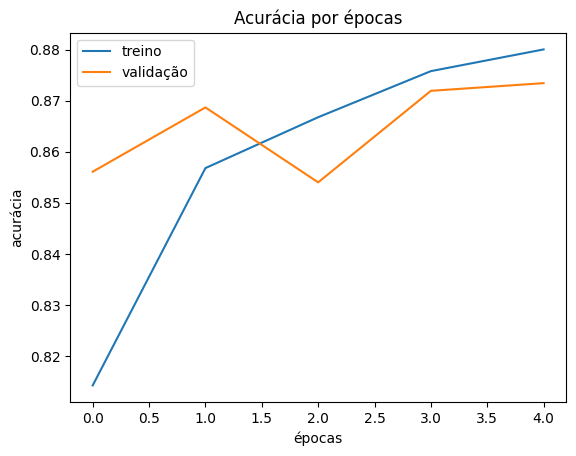

In [28]:
plt.plot(historico.history['accuracy']);
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Visualizando as perdas de treino e validação por época

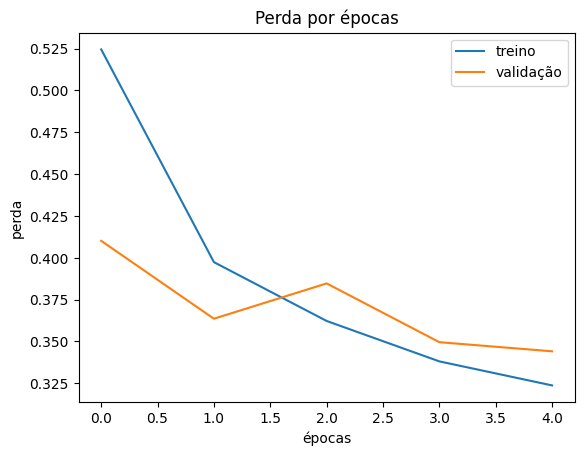

In [24]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [25]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo


In [26]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 62.5006 - accuracy: 0.8453
Perda do teste: 62.50057601928711
Acurácia do teste: 0.845300018787384
